<b>Data Source:</b> <br>
<b>Time-Series Analysis for Whether Dataset, Gaurav Rajesh Sahani.</b> <br>
<b>Retrieved from </b>https://www.kaggle.com/datasets/gauravsahani/timeseries-analysis-for-whether-dataset <br>

# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.tsa.stattools import adfuller
from scipy.stats.distributions import chi2 
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from math import sqrt
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Importing the Data and Pre-processing

In [100]:
raw_csv_data = pd.read_csv("Time-Series Analysis Dataset.csv") 
df_comp=raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['datetime_local'], dayfirst=True, utc=True)
df_comp.set_index('date', inplace=True)
# Cek apakah ada duplikat
duplicates = df_comp.index.duplicated()

# Hapus duplikat (pilih yang pertama)
df_comp = df_comp[~df_comp.index.duplicated(keep='first')]

# Ubah frekuensi ke hari kerja
df_comp = df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp.head()

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
date,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.00,partly-cloudy-night
2019-10-02 00:00:00+00:00,02-10-2019 00:00,26.0,1.0,20.53,85.0,3.13,6.29,1010.06,0.0,275.6,0.00,clear-night
2019-10-03 00:00:00+00:00,03-10-2019 00:00,26.0,1.0,20.54,136.0,2.06,6.31,1008.95,0.0,271.9,0.00,partly-cloudy-night
2019-10-04 00:00:00+00:00,04-10-2019 00:00,26.0,1.0,19.57,164.0,2.92,5.84,1010.36,0.0,272.7,0.01,clear-night
2019-10-07 00:00:00+00:00,07-10-2019 00:00,25.0,1.0,15.61,359.0,4.07,8.38,1010.99,0.0,271.6,0.00,cloudy


In [49]:
df_comp.isnull().sum()

datetime_local      0
temperature         0
humidity            0
dew_point           0
wind_bearing        0
wind_speed          0
wind_gust           0
pressure            0
uv_index            0
ozone               0
precip_intensity    0
icon                0
dtype: int64

#  Stationarity and Differencing 

In [53]:
adf_result = adfuller(df_comp['temperature'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] <= 0.05:
    print("✅ Series is stationary")
else:
    print("⚠️ Series is NOT stationary. Consider differencing.")

ADF Statistic: -2.0728716643855742
p-value: 0.2555619997950689
⚠️ Series is NOT stationary. Consider differencing.


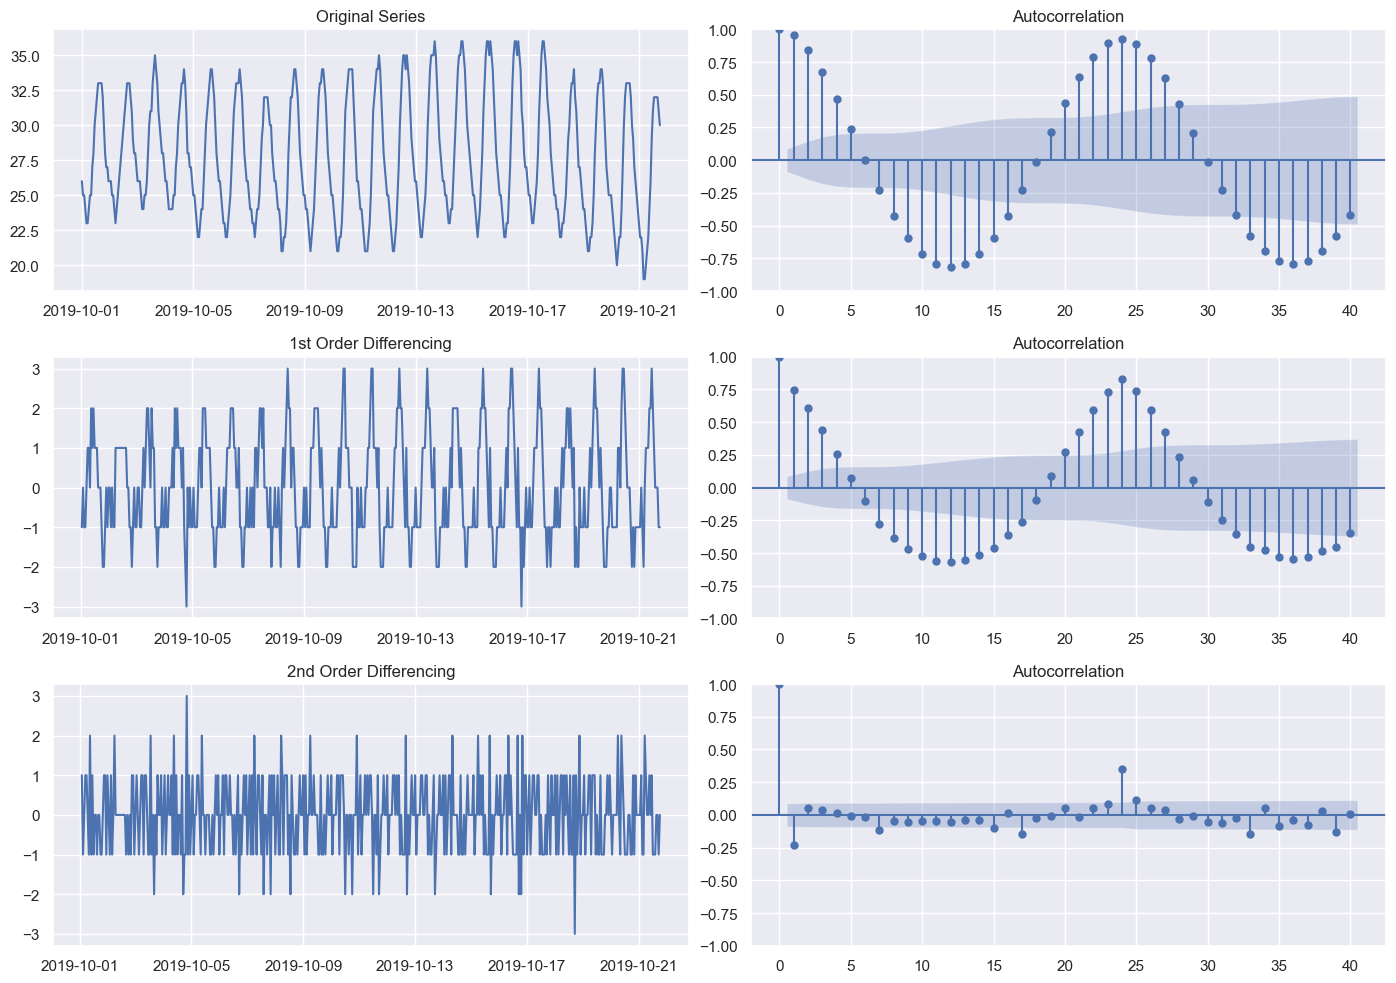

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load and prepare your dataset
df_comp = pd.read_csv("Time-Series Analysis Dataset.csv")

# Parse datetime with day-first format
df_comp['date'] = pd.to_datetime(df_comp['datetime_local'], dayfirst=True, utc=True)
df_comp.set_index('date', inplace=True)

# Drop missing values in temperature
df_comp['temperature'] = pd.to_numeric(df_comp['temperature'], errors='coerce')
df_comp = df_comp.dropna(subset=['temperature'])

# Create differenced series
temp_diff1 = df_comp['temperature'].diff().dropna()
temp_diff2 = temp_diff1.diff().dropna()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Plot original series
axes[0, 0].plot(df_comp['temperature'])
axes[0, 0].set_title('Original Series')
plot_acf(df_comp['temperature'].dropna(), ax=axes[0, 1], lags=min(40, len(df_comp) // 2))
axes[0, 1].set_title('Autocorrelation')

# 1st order differencing
axes[1, 0].plot(temp_diff1)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(temp_diff1, ax=axes[1, 1], lags=min(40, len(temp_diff1) // 2))
axes[1, 1].set_title('Autocorrelation')

# 2nd order differencing
axes[2, 0].plot(temp_diff2)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(temp_diff2, ax=axes[2, 1], lags=min(40, len(temp_diff2) // 2))
axes[2, 1].set_title('Autocorrelation')

plt.tight_layout()
plt.show()


In [65]:
adf_result = adfuller(df_comp['temperature'].diff().dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] <= 0.05:
    print("✅ Series is stationary")
else:
    print("⚠️ Series is NOT stationary. Consider differencing.")

ADF Statistic: -16.755115543109042
p-value: 1.324119164002031e-29
✅ Series is stationary


### This conclude that we only need differencing once or ARIMA(p,1,q)

# Train split data

In [67]:
size = int(len(df_comp)*0.95)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

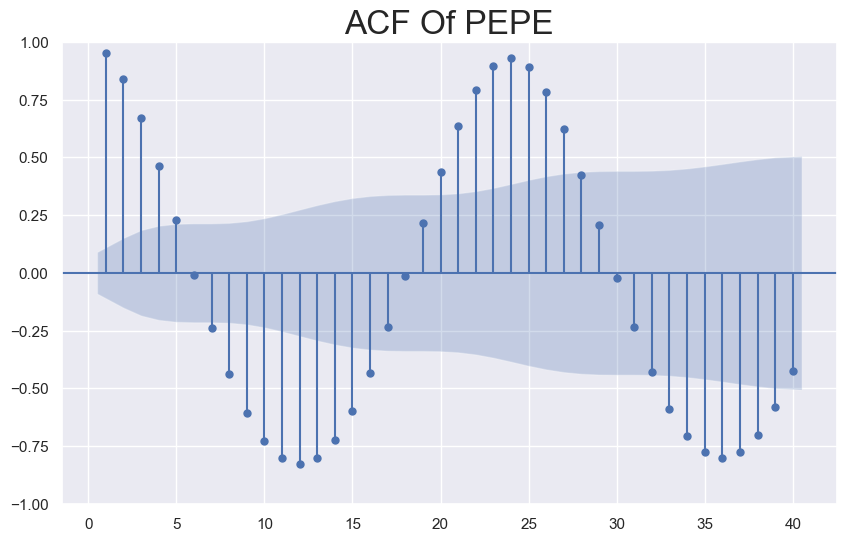

In [69]:
sgt.plot_acf(df.temperature, zero = False, lags = 40)
plt.title('ACF Of PEPE',size = 24)
plt.show()

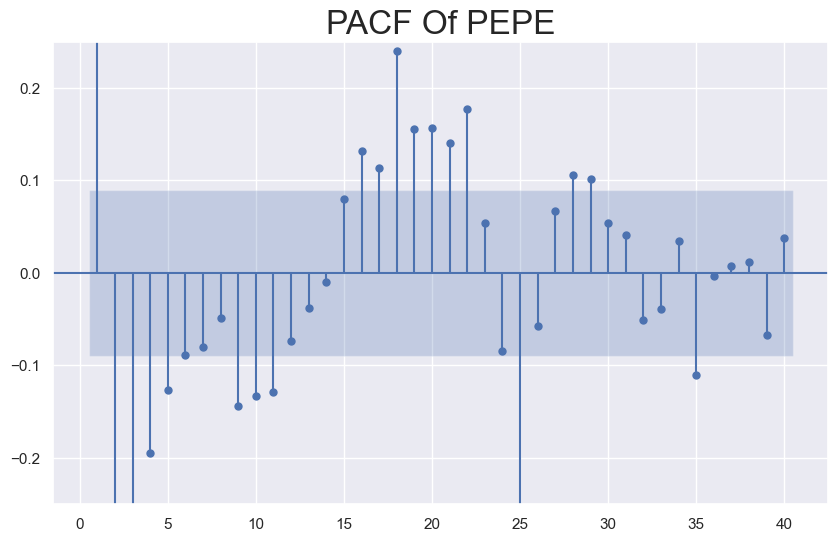

In [71]:
sgt.plot_pacf(df.temperature, zero = False, lags = 40)
plt.title('PACF Of PEPE',size = 24)
plt.ylim(-0.25,0.25)
plt.show()

In [84]:
from pmdarima import auto_arima

# Define endogenous (target) and exogenous (features) variables
y = df['temperature']
X = df[['humidity', 'dew_point','wind_bearing','wind_speed','wind_gust','pressure','uv_index','ozone','precip_intensity']]  # Exogenous variables

# Fit ARIMAX model
model = auto_arima(df['temperature'],
                   d=1,
                   seasonal=False,
                   stepwise=True,
                   trace=True)


model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1014.925, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1585.283, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1213.771, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1374.789, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1583.329, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1202.889, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1208.425, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1097.543, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1210.053, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1199.261, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1010.165, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1200.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  474
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -491.936
Date:                Mon, 26 May 2025   AIC                            995.871
Time:                        15:01:01   BIC                           1020.826
Sample:                    10-01-2019   HQIC                          1005.686
                         - 10-20-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9239      0.006    347.822      0.000       1.913       1.935
ar.L2         -0.9924      0.006   -178.920      0.000      -1.003      -0.982
ma.L1         -1.7212      0.048    -35.829      0.000      -1.815      -1.627
ma.L2          0.5487      0.094      5.868      0.000       0.365       0.732
ma.L3          0.2036      0.049      4.115      0.000       0.107       0.301
sigma2         0.4710      0.037     12.844      0.000       0.399       0.543
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.17
Prob(Q):                              0.76   Prob(JB):                         0.08
Heteroskedasticity (H):               1.19   Skew:                             0.09
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
predictions_arimax = model.predict(n_periods = len(df_test))
predictions_arimax

2019-10-20 18:00:00+00:00    30.885232
2019-10-20 19:00:00+00:00    29.550971
2019-10-20 20:00:00+00:00    28.006100
2019-10-20 21:00:00+00:00    26.358113
2019-10-20 22:00:00+00:00    24.720760
2019-10-20 23:00:00+00:00    23.206203
2019-10-21 00:00:00+00:00    21.917335
2019-10-21 01:00:00+00:00    20.940801
2019-10-21 02:00:00+00:00    20.341181
2019-10-21 03:00:00+00:00    20.156726
2019-10-21 04:00:00+00:00    20.396943
2019-10-21 05:00:00+00:00    21.042150
2019-10-21 06:00:00+00:00    22.045055
2019-10-21 07:00:00+00:00    23.334203
2019-10-21 08:00:00+00:00    24.819058
2019-10-21 09:00:00+00:00    26.396352
2019-10-21 10:00:00+00:00    27.957261
2019-10-21 11:00:00+00:00    29.394909
2019-10-21 12:00:00+00:00    30.611678
2019-10-21 13:00:00+00:00    31.525828
2019-10-21 14:00:00+00:00    32.076983
2019-10-21 15:00:00+00:00    32.230107
2019-10-21 16:00:00+00:00    31.977714
2019-10-21 17:00:00+00:00    31.340174
2019-10-21 18:00:00+00:00    30.364104
Freq: h, dtype: float64

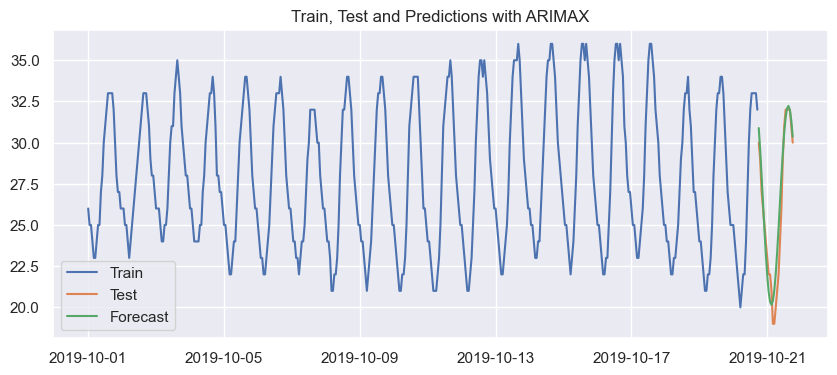

The MAE is 1.03
The RMSE is 1.31
The MAPE is 4.51 %


In [88]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Model assessment
model_assessment(df['temperature'], df_test['temperature'], predictions_arimax, "ARIMAX")

The ARIMAX model demonstrates strong forecasting performance on the temperature time series. Visually, the forecasted values (green line) closely align with the actual test data (orange line), accurately capturing both the amplitude and cyclical patterns of the temperature fluctuations.

The quantitative performance metrics further validate this result:

    Mean Absolute Error (MAE): 1.03

    Root Mean Squared Error (RMSE): 1.31

    Mean Absolute Percentage Error (MAPE): 4.51%

These values indicate high predictive accuracy, with an average deviation of just over 1°C from the actual values. The low MAPE suggests the model generalizes well and is well-suited for short-term temperature forecasting in this context.

Overall, the ARIMAX model effectively integrates external variables and autoregressive structure to model the time series, making it a reliable tool for forecasting similar environmental data.

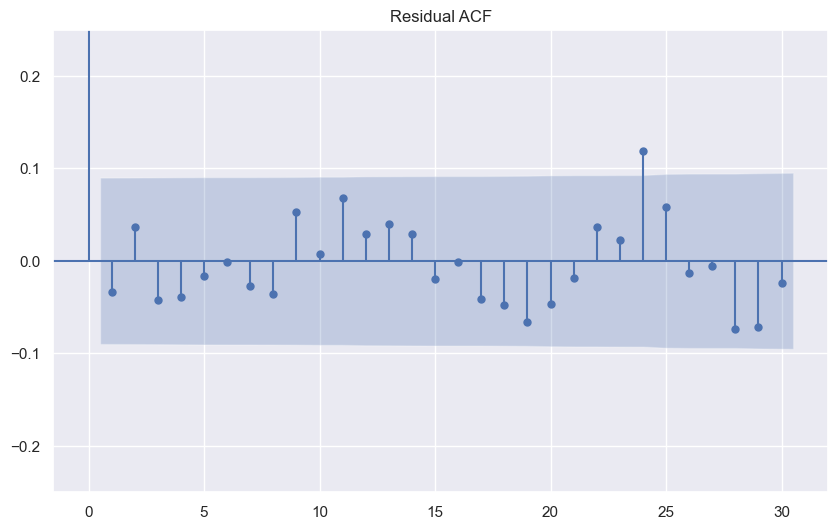

In [92]:
import statsmodels.api as sm
residuals = pd.Series(model.resid())
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title("Residual ACF")
plt.ylim(-0.25,0.25)
plt.show()

The residual look like white noise

In [94]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid(), lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.279261,0.87176




Base on Ljung-Box Test, the model has captured the autocorrelation structure of the data well, Your model's residuals behave like white noise (i.e., no remaining structure).
